# Exploratory Data Analysis (EDA) - Customer Churn in Telecom
Understand an extensive step-by-step guide of EDA in R using Kaggle dataset - [Telco Customer Churn][id].

[id]: https://www.kaggle.com/blastchar/telco-customer-churn "dataset"

## Overview
In this post, I will follow the guide from [A Comprehensive Guide to Data Exploration][id1] to perform and discuss completely exploratory data analysis of the [Telco Customer Churn][id2] dataset.

[id1]: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one "EDA"
[id2]: https://www.kaggle.com/blastchar/telco-customer-churn "dataset"

## Introduction of EDA
Exploratory Data Analysis (EDA) is an approach to see what data can tell us beyond the formal sophisticated analysis and summarize dataset main characteristics with visual methods. To be more specific, we use EDA to gain insight into a dataset, examine variables, detect anomalies, and prepare data before applying a predictive model. Since <strong>good input quality will lead to good output quality</strong>, this process could also help to increase the accuracy of the models. Thus, it is important to spend significant time on it, accounting for about 70% of the project time. 

## Dataset Overview
The “Telco Customer Churn” dataset, which is downloaded from Kaggle, includes information about customer characteristics and whether customers churn or not. Customers <strong>churn</strong> refers to when customers or subscribers stop doing business with a company or service. There are 7043 observations of 21 variables. To elaborate, columns one to twenty include services that each customer has signed up for, customer account information, and customer demographic information. The twenty-first column indicates whether the customer has churned within the last month. In the near future, I will also write a post of how I use this dataset to build predictive models. 

## Steps
<ol>
 <li><strong>Variable Identification</strong></li>
    <ol>
        <li>Predictor and Target</li>
        <li>Data Type</li>
        <li>Variable Category</li>
    </ol>
 <li><strong>Univariate Analysis </strong></li>
    <ol>
        <li>Numerical</li>
        <li>Categorical</li>
    </ol>
 <li><strong>Bi-variate Analysis</strong></li>
     <ol>
        <li>Categorical & Categorical</li>
        <li>Categorical & Numerical</li>
        <li>Numerical & Numerical</li>
    </ol>
 <li><strong>Missing Value Treatment</strong></li>
    
 <li><strong>Outlier Treatment</strong></li>
    
 <li><strong>Feature Engineering</strong></li>
    <ol>
        <li>Variable Transformation</li>
        <li>Variable/Feature Creation</li>
    </ol>
</ol>

In [1]:
# Load data 
Telco<- read.csv(file = '/Users/yuki0416/Desktop/Q2-Spring/Intermediate Analytics/Final Project/WA_Fn-UseC_-Telco-Customer-Churn.csv',header = TRUE)

# Load package
library(ggplot2)
library(scales)
library(ggpubr)
library(magrittr)

Loading required package: magrittr



## 1. Variable Identification
The first step of EDA is to identify Predictor and Target variables, the Data Type, and the Category of the variables. To do so, I used str() function in R and look up data dictionary from the original source. 

In [2]:
# Examine data type, variable category
str(Telco)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

To forecast customer churn, “<strong>churn</strong>” is selected to be a target variable and except for "customerID", all other variables are considered predictors. From the output below, we can tell that the data type of “<ins>SeniorCitizen</ins>” should be changed. Since it recorded whether the customer is a senior citizen, the data type should be altered from Int (1/0) to Factor (Yes/No) to better represent category. After that, the variable category would also transform from discrete to categorical.

In [3]:
# Adjust data type (SeniorCitizen: Int -> Factor)
Telco$SeniorCitizen=as.factor(ifelse(Telco$SeniorCitizen==1, "Yes", "No")) 
attach(Telco)

## 2. Univariate Analysis 
Second, I am going to explore different variables and calculate descriptive statistics one by one with different metrics depending on its category (<ins>Numerical/Categorical</ins>).

### A. Numerical Variable
Numerical variable, which with quantitative data, can be classified as discrete or continuous. In the case of this category, we tend to discover the central tendency and spread of the variable using histogram or boxplot to visualize. In our dataset, numerical variables include “tenure”, “MonthlyCharges”, and “TotalCharges”. Let’s explore them with several approaches.

- **5 Summary Numbers**<br /> 
In regard to the central tendency, 5 Summary Numbers include the minimum, the first quartile, the median (the second quartile), the third quartile, and the maximum. By using fivenum() function in R, we can get results. 

In [4]:
# 5 summary numbers (min, Q1, Q2/median, Q3, Max)
fivenum(tenure)
fivenum(MonthlyCharges)
fivenum(TotalCharges)

[1]  0  9 29 55 72

[1]  18.25  35.50  70.35  89.85 118.75

[1]   18.800  401.400 1397.475 3794.975 8684.800

- **Histogram**<br /> 
A histogram represents the distribution of numerical data and it uses bars of different heights to show frequencies. From the graph, we can tell the overall distribution and the mode. 

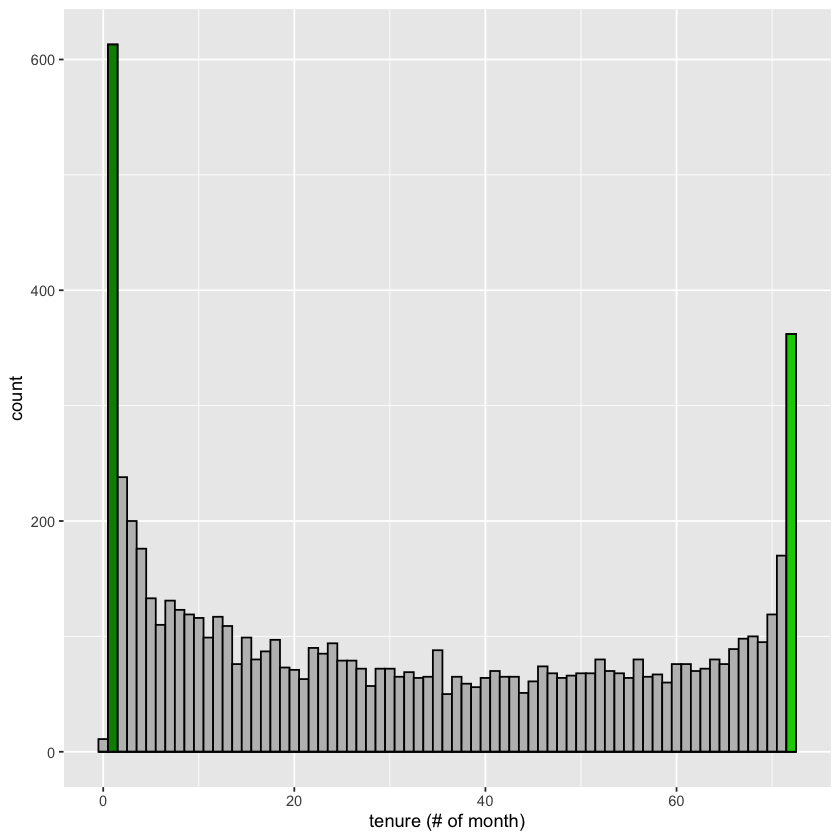

In [5]:
# tenure
tenure_his <- ggplot(Telco, aes(x=tenure)) + 
  geom_histogram(binwidth = 1, color="black",fill="grey") + # create histogram
  geom_histogram(data=subset(Telco,tenure==1),binwidth=1, colour="black", fill="green4") + # highlight mode
  geom_histogram(data=subset(Telco,tenure==72),binwidth=1, colour="black", fill="green3") + # highlight second higer mode
  xlab("tenure (# of month)") # annotate X label
tenure_his

<strong>tenure</strong>: the mode highlighted in green equals 1 and the second higher count, colored in light green, equals 72. That is to say, in our data, there is a large number of new customers who have stayed for a month, while another large number of loyal customers who might have signed long-term contracts. 

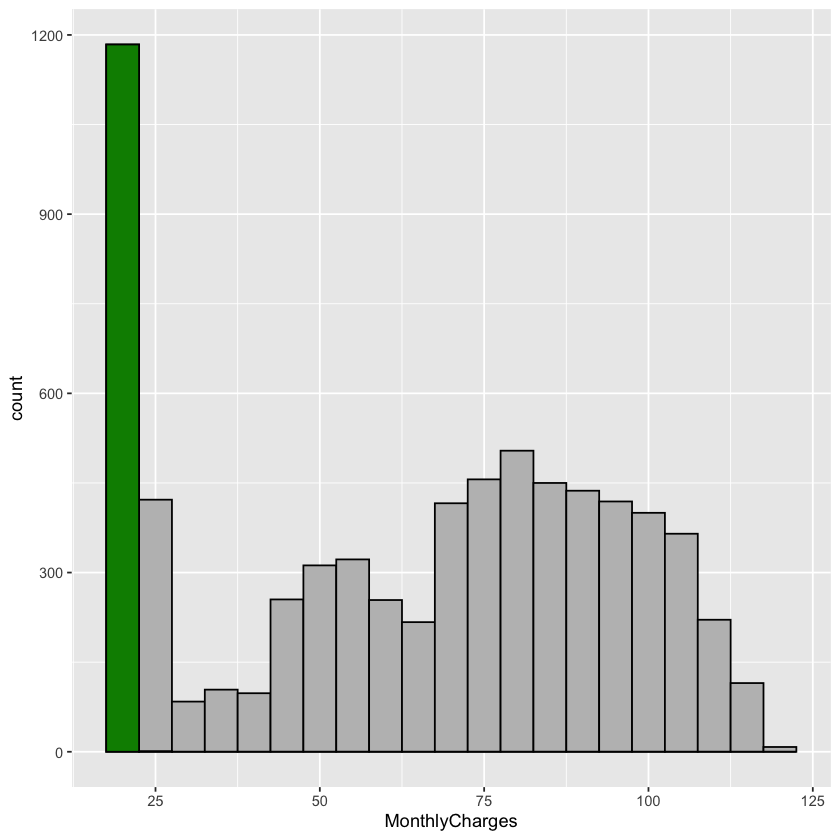

In [6]:
# MonthlyCharges
MonthlyCharges_his <- ggplot(Telco, aes(x=MonthlyCharges)) + 
  geom_histogram(binwidth = 5, color="black",fill="grey") + # create histogram
  geom_histogram(data=subset(Telco,MonthlyCharges<23),binwidth=5, colour="black", fill="green4") # highlight mode
MonthlyCharges_his

<strong>MonthlyCharges</strong>: it appears most frequently that customers spend less than $25 per month.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”


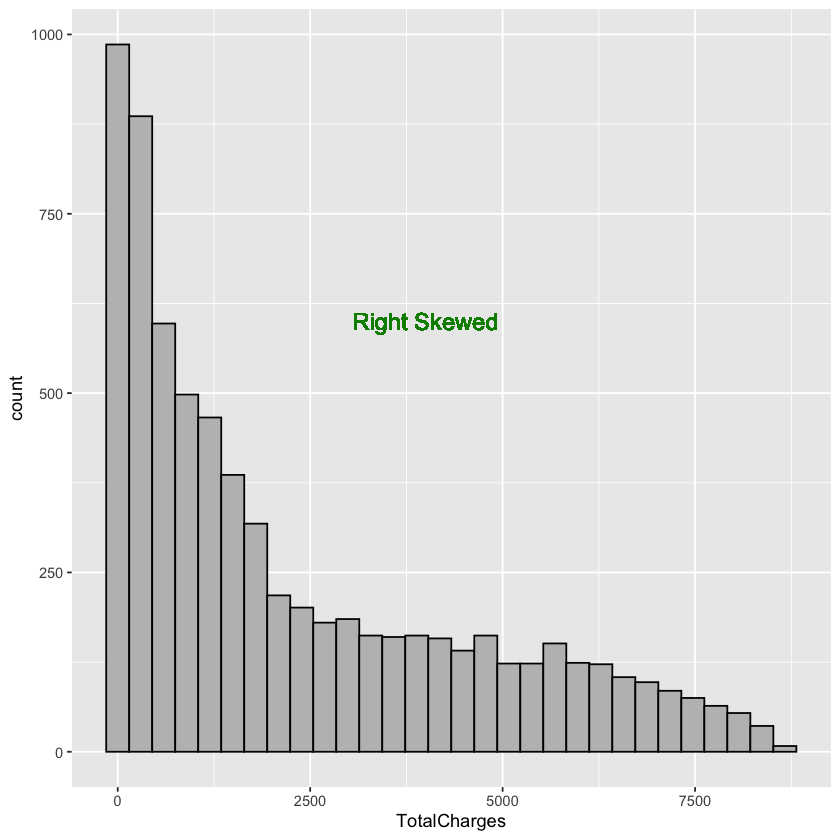

In [7]:
# TotalCharges
TotalCharges_his <- ggplot(Telco, aes(x=TotalCharges)) + 
  geom_histogram(color="black",fill="grey", bins=30) + # create histogram
  geom_text(x=4000, y=600, label="Right Skewed", size=5, color="green4") #annotate distribution
TotalCharges_his

<strong>TotalCharges</strong>: we can tell that the distribution of this data is right skewed.  

- **Boxplot**<br /> 
As we know that 5 summary numbers could provide information about a dataset, boxplot is a quick method to visualize them.

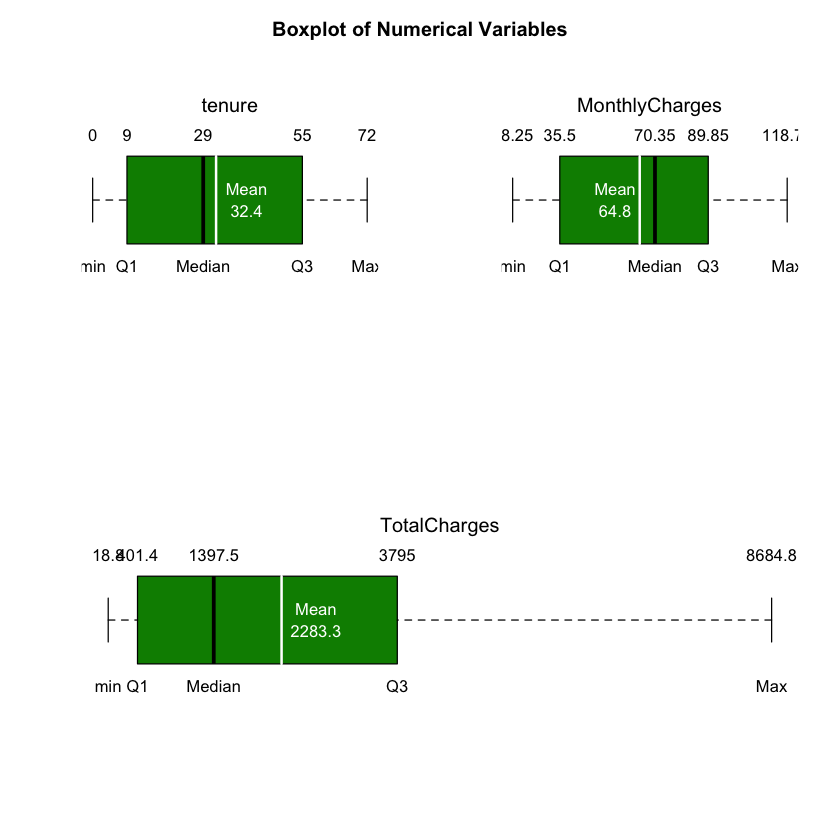

In [8]:
# create 5 summary numbers labels
five <-c("min","Q1","Median","Q3","Max")

# Arrange on one page
layout(matrix(c(1,2,3,3), 2, 2, byrow = TRUE))

# tenure
boxplot(tenure, horizontal=TRUE, col="green4", axes=FALSE)
title("tenure", line = -1.5, font.main = 1) # Adjust plot title position
text(x=fivenum(tenure), labels =fivenum(tenure), y=1.3, cex=1) # put 5 summary numbers data values
text(x=fivenum(tenure), labels =five, y=0.7, cex=1) # put 5 summary numbers labels
lines(rep(mean(tenure),2),c(0.8, 1.2), col="white", lwd = 2) # add Mean line
text(x=mean(tenure)+8, labels ="Mean", y=1.05, col="white", cex=1) # add Mean text 
text(x=mean(tenure)+8, labels =round(mean(tenure),digit=1), y=0.95, col="white", cex=1) # add Mean data value

#MonthlyCharges
boxplot(MonthlyCharges, horizontal=TRUE, col="green4", axes=FALSE)
title("MonthlyCharges", line = -1.5, font.main = 1) # Adjust plot title position
text(x=fivenum(MonthlyCharges), labels =fivenum(MonthlyCharges), y=1.3, cex=1) # put 5 summary numbers data values
text(x=fivenum(MonthlyCharges), labels =five, y=0.7, cex=1) # put 5 summary numbers labels
lines(rep(mean(MonthlyCharges),2),c(0.8, 1.2), col="white", lwd = 2) # add Mean line
text(x=mean(MonthlyCharges)-9, labels ="Mean", y=1.05, col="white", cex=1) # add Mean text 
text(x=mean(MonthlyCharges)-9, labels =round(mean(MonthlyCharges),digit=1), y=0.95, col="white", cex=1) # add Mean data value

# TotalCharges
boxplot(TotalCharges, horizontal=TRUE, col="green4", axes=FALSE)
title("TotalCharges", line = -1.5, font.main = 1) # Adjust plot title position
text(x=fivenum(TotalCharges), labels =round(fivenum(TotalCharges),digit=1), y=1.3, cex=1) # put 5 summary numbers data values
text(x=fivenum(TotalCharges), labels =five, y=0.7, cex=1) # put 5 summary numbers labels
lines(rep(mean(TotalCharges, na.rm=TRUE),2),c(0.8, 1.2), col="white", lwd = 2) # add Mean line
text(x=mean(TotalCharges, na.rm=TRUE)+450, labels ="Mean", y=1.05, col="white", cex=1) # add Mean text 
text(x=mean(TotalCharges, na.rm=TRUE)+450, labels =round(mean(TotalCharges, na.rm=TRUE),digit=1), y=0.95, col="white", cex=1) # add Mean data value

# Add Title for a Page
mtext("Boxplot of Numerical Variables", side=3, line = -2, outer = TRUE, font=2)

If we look at the boxplot of “TotalCharges”, we can tell that the whisker on the left is much shorter than the whisker on the right and the median is lower than the mean. That is to say, the shape of “TotalCharges” data is skewed right, the same as what we have concluded from the histogram. By using boxplots, we can roughly view or calculate the range and IQR to see the spread in the dataset. Normally, we can also detect outlier using boxplot. However, from the graph above, we can tell that there is no outlier in these three variables. 

### B. Categorical Variable
Categorical variable, which with qualitative data, can be measured using metrics such as Count and Count% against each category. To visualize, we can use a pie or bar chart. Note that mode can also be discovered in a categorical variable. Let’s take our target variable “churn” as an example.

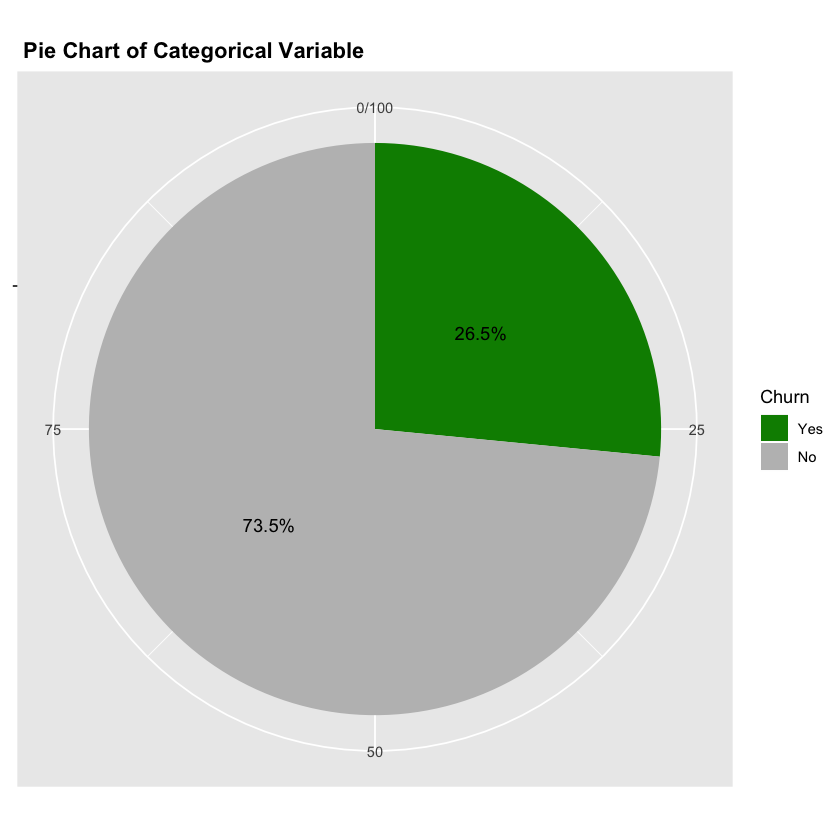

In [9]:
# Pie chart
Churn_y <- sum(Churn=="Yes") # sum of churn
Churn_n <- sum(Churn=="No") # sum of non-churn
slices <- c(Churn_y,Churn_n) # create slices of pie
pct <- (slices/sum(slices)*100) # calculate % of slices
churn_dataframe <- data.frame(group = c("Yes","No"),value = c(pct)) # create churn data frame

# Pie of Churn
Churn_pie <- ggplot(churn_dataframe, aes(x="", y=value, fill=group)) + 
  geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) + # create pie
  geom_text(aes(label=sprintf("%.1f%%",value)), position = position_stack(vjust = 0.5)) + #put data labels
  scale_fill_manual(values=c("grey","green4"),breaks=c("Yes","No")) + # change fill color and legend order
  labs(x = NULL, y = NULL, fill = "Churn", title = " Pie Chart of Categorical Variable") + # change legend title and put main title
  theme(plot.title = element_text(face="bold")) # bold title
Churn_pie

Since there are only two outcomes in “churn” (Yes/No), I chose using a pie chart instead of bar chart to show count% while presenting part of a whole. From the pie, we can tell that the churn rate is nearly 27%, suggesting that solving churn problem is critical to the company.

## 3. Bi-variate Analysis 
The purpose of bi-variate analysis is to finds out the relationship between two variables. We can perform bi-variate analysis of <ins>Categorical & Categorical</ins>, <ins>Categorical & Numerical</ins>, or <ins>Numerical & Numerical</ins> and use different methods of examination depending on combination type. Let's look at some of the relationships we are interested in each combination.

### A. Categorical & Categorical Variable
To explore the relationship between two categorical variables, we can use methods such as two-way table, stacked column chart, 100% stacked bar chart, or chi-square test. I selected “Gender”, “SeniorCitizen”, and “churn” to see the churn status of different genders and ages.

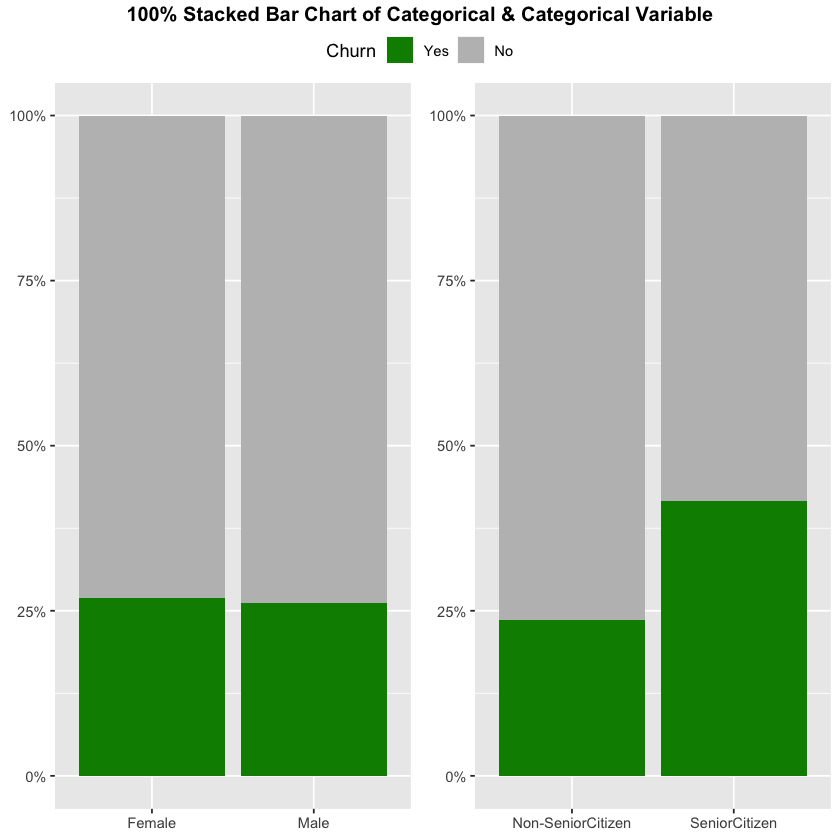

In [10]:
# Gender & Churn
Gender.Churn_sbc <- ggplot(Telco, aes(gender,fill=Churn)) + 
  geom_bar(position = 'fill') + # create 100% stacked bar chart
  scale_fill_manual(values=c("grey","green4"),breaks=c("Yes","No")) + # change fill color and legend order
  labs(x=NULL, y = NULL) + scale_y_continuous(labels = percent) # remove x, y label and change y axis to percent

# SeniorCitizen & Churn
SeniorCitizen_labels <- c("Non-SeniorCitizen", "SeniorCitizen") # create x label of "SeniorCitizen"
SeniorCitizen.Churn_sbc <- ggplot(Telco, aes(SeniorCitizen,fill=Churn)) + 
  geom_bar(position = 'fill') + # create 100% stacked bar chart
  scale_fill_manual(values=c("grey","green4"), breaks=c("Yes","No")) + # change fill color and legend order
  labs(x = NULL, y = NULL) + scale_y_continuous(labels = percent) + # remove x, y label and change y axis to percent
  scale_x_discrete(labels=SeniorCitizen_labels) # change x axis data label

# Arrange on one page
sbc_figure <- ggarrange(Gender.Churn_sbc, SeniorCitizen.Churn_sbc, ncol = 2, nrow = 1, common.legend = TRUE)
# Annotate figure 
annotate_figure(sbc_figure, top = text_grob("100% Stacked Bar Chart of Categorical & Categorical Variable", face = "bold", size = 12))

<strong>Gender & Churn</strong>: the proportion of churn in male customers is similar to the proportion of churn in female customers. <br/>
<strong>SeniorCitizen & Churn</strong>: the proportion of churn in senior citizen is much higher than the proportion of churn in non-senior citizen. In other words, it seems like senior citizen customers are more likely to leave.

### B. Categorical & Numerical Variable
To examine the relationship between categorical and numerical variable, we can create box plots for each level of categorical variable or perform Z-test, T-test, or ANOVA. Here I selected numerical variables “tenure” and “MonthlyCharges” and the most important categorical variable, “churn”, to build box plots.

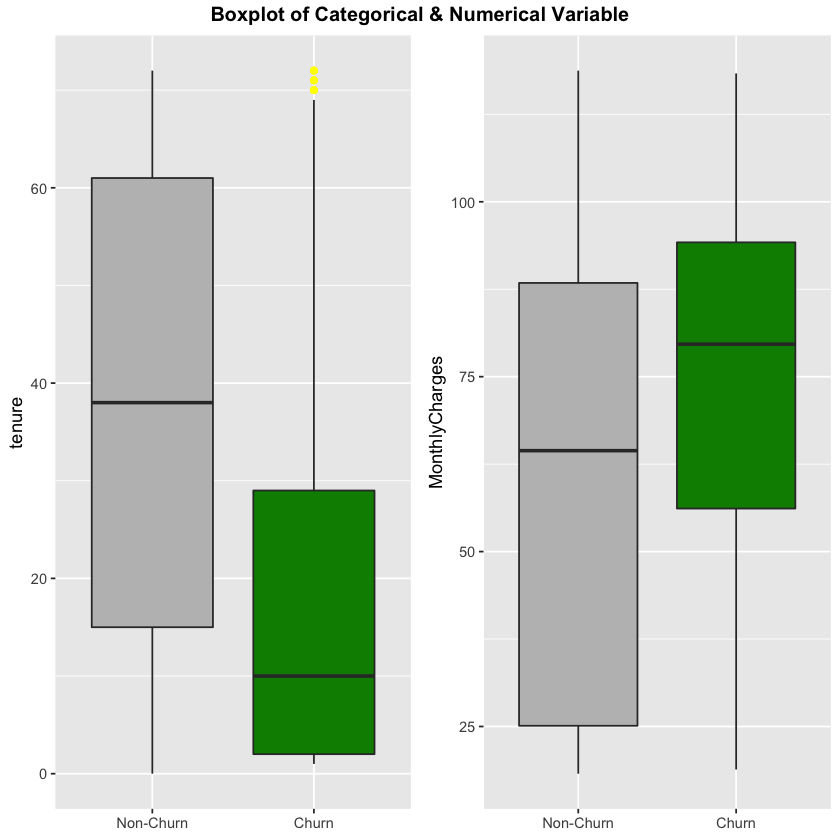

In [11]:
# Create churn label
Churn_label <- c("Non-Churn", "Churn")

# Churn & tenure
Churn.tenure_bp <- ggplot(Telco, aes(y= tenure, x = Churn, fill = Churn)) +
  geom_boxplot(outlier.colour = "yellow") + theme(legend.position = "none") + labs(x = NULL) +
  scale_fill_manual(values=c("grey","green4")) + scale_x_discrete(labels=Churn_label) 

# Churn & MonthlyCharges
Churn.MonthlyCharges_bp <- ggplot(Telco, aes(y= MonthlyCharges, x = Churn, fill = Churn)) +
  geom_boxplot(outlier.colour = "yellow") + theme(legend.position = "none") + labs(x = NULL) +
  scale_fill_manual(values=c("grey","green4")) + scale_x_discrete(labels=Churn_label)

# Arrange on one page
bp_figure <- ggarrange(Churn.tenure_bp, Churn.MonthlyCharges_bp, ncol = 2, nrow = 1)
# Annotate figure 
annotate_figure(bp_figure, top = text_grob("Boxplot of Categorical & Numerical Variable", face = "bold", size = 12))

<strong>tenure</strong>: compared to customers who have stayed, most of the customers who have churned stayed a shorter number of months with the company. To be more specific, the median tenure of customers who have left is around 10 months, indicating that the churned customer is more likely a new customer than a loyal customer. Note that there are some outliers colored in yellow dots. <br/>
<strong>MonthlyCharges</strong>: compared to customers who have stayed, most of the customers who have churned are charged a higher monthly fee. 

### C. Numerical & Numerical Variable
To find out the relationship between two numerical variables, we can draw a scatter plot. The relationship can be linear or non-linear and the strength of that relationship can be find using correlation. Based on common knowledge, I tried to test the relationship between “tenure* MonthlyCharges” and “TotalCharges". 

tenure MonthlyCharges   TotalCharges 
             0              0             11

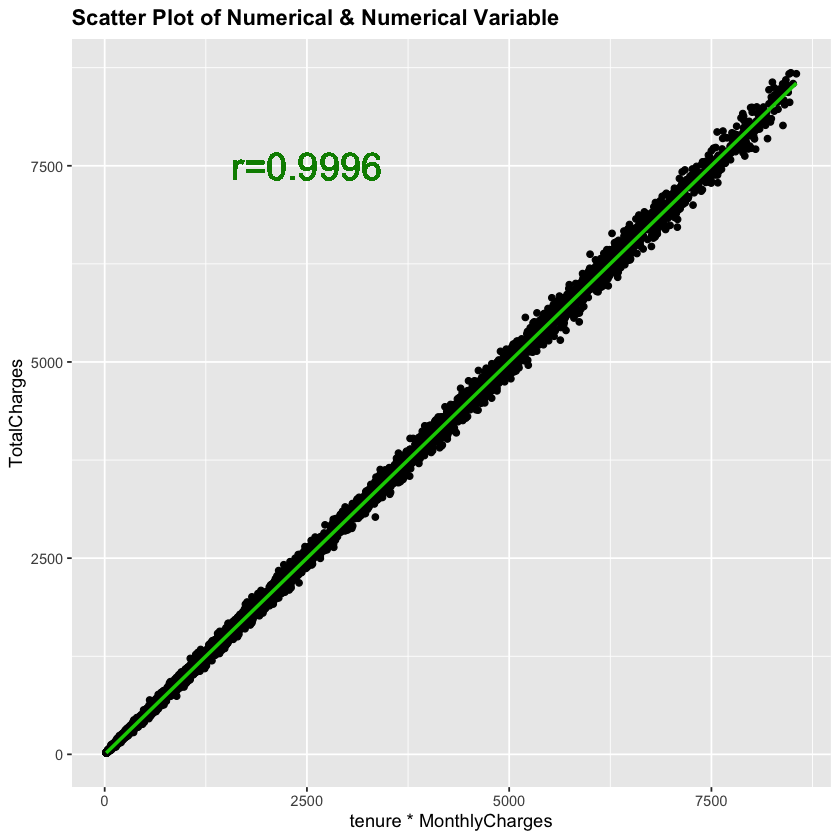

In [12]:
# Create new data frame - charges
charges <- Telco[c(6,19,20)] # select tenure, MonthlyCharges, TotalCharges data
colSums(is.na(charges)) # examin Na before calculating Correlation Coefficient  
charges <- na.omit(charges) # omit Na in charges data frame
charges$tenure.MonthlyCharges <- charges$tenure*charges$MonthlyCharges # add new column

# calculate Correlation Coefficient
charges_cor <- round(cor(charges$tenure.MonthlyCharges,charges$TotalCharges),digit=4)

# Scatter Plot (sp) of Charges
charges_sp <- ggplot(charges, aes(x=tenure.MonthlyCharges, y=TotalCharges)) +
  geom_point() + geom_smooth(method = "lm", colour = "green3") + # add point and line
  ggtitle("Scatter Plot of Numerical & Numerical Variable") + # put main title
  xlab("tenure * MonthlyCharges") + # adjust x axis label
  geom_text(x=2500, y=7500, label=paste0("r=",charges_cor), size=8, color="green4") + # put annotation
  theme(plot.title = element_text(face="bold")) # bold title
charges_sp

The result presents that there is a strong positive correlation, since nearly all of the data points fall on a line the and correlation coefficient is close to 1. Also, from the graph, it is apparent that “tenure* MonthlyCharges” seems equal to “TotalCharges”, since the slope of the line is 1.

#### From step 1 to 3, we have examined variables and gained insight into a dataset. Next, I will start to do some data cleanup and pre-processing. 

## 4. Missing Value Treatment 
Treating missing value is a critical process as missing data in the training dataset can reduce the power of a model or lead to a biased model, thereby leading to wrong prediction or classification. To ensure models quality, we can use different methods to treat NA, such as deletion, Mean/ Mode/ Median imputation, prediction model, or KNN imputation, depending on different reasons and the number of cases.

In [13]:
# Examin Na 
colSums(is.na(Telco))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

When calculating a correlation coefficient in step 3, I found that there are 11 missing values in “TotalCharges” and I deleted them directly. After I completed examination, I determined that those are the only missing values in our dataset. To cope with them properly, we have to find the reason why they are missing. If they are missing at random, we can just delete them given that they only account 0.15% (11/7043) in our dataset. 

In [14]:
# Create new data frame with NA
Telco.na <- Telco[is.na(Telco$TotalCharges),] 

# Find missing reason
Telco.na[c("tenure", "MonthlyCharges", "TotalCharges")]

,tenure,MonthlyCharges,TotalCharges
,<int>,<dbl>,<dbl>
489,0,52.55,NA
754,0,20.25,NA
937,0,80.85,NA
1083,0,25.75,NA
1341,0,56.05,NA
3332,0,19.85,NA
3827,0,25.35,NA
4381,0,20.00,NA
5219,0,19.70,NA


After analyzing, I found that the missing reason is that "tenure" equals 0. Therefore, to treat them, I substituted “TotalCharges” with “tenure* MonthlyCharge” as we know they are almost the same. Those missing values then have become 0.

In [15]:
# Replace "TotalCharges" with "tenure* MonthlyCharges"
Telco$TotalCharges <- ifelse(is.na(TotalCharges), tenure*MonthlyCharges, TotalCharges)

## 5. Outlier Treatment
Outlier is an observation that differs significantly from other observations and could result in wildly wrong estimations. There are two types of outlier, <ins>Univariate</ins> and <ins>Multivariate</ins>. To find univariate outliers, the most common method is 1.5* IQR using boxplot. On the other hand, multivariate outliers can be detected in a scatter plot. The same way we treat missing value, outlier can be dealt with on the condition of why they occur and the number of cases. 

## 6. Feature Engineering
The main objective of this step is to make data we already have more useful. It can be divided into two steps, <ins>Variable Transformation</ins> and <ins>Variable/Feature Creation</ins>.

### A. Variable Transformation
There are various methods we can use to transform variables, including changing the scale or standardizing the values of a variable, square/cube root of a variable, changing the type of a variable, and binning it to a categorical variable. Previously, I have changed the data type of “SeniorCitizen” in step 1. Now I would like to transform the target variable “churn” data type from Factor (Yes/No) to Numeric (1/0) as it'll be more convenient to use for functions when building predictive model in the future.

In [16]:
# Change target variable data type (churn: Factor -> Nnumeric)
Telco$Churn=as.numeric(ifelse(Telco$Churn=="Yes", 1, 0))
str(Telco$Churn)

 num [1:7043] 0 0 1 0 1 1 0 0 1 0 ...


Another thing I did in this step is to clean the categorical features of numbers of variables. There are “No” and “No phone Service” or “No internet Service” as categories in “MultipleLines” and other Internet-related variables. However, I changed “No phone Service” and “No internet Service” into “No” as they are basically the same. After that, levels in those variables also have been cleaned.

In [17]:
str(Telco[c(8,10:15)])

'data.frame':	7043 obs. of  7 variables:
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 1 1 3 1 ...
 $ StreamingTV     : Factor w/ 3 levels "No","No internet service",..: 1 1 1 1 1 3 3 1 3 1 ...
 $ StreamingMovies : Factor w/ 3 levels "No","No internet service",..: 1 1 1 1 1 3 1 1 3 1 ...


In [18]:
# Clean the categorical features 
# Replace column (No phone service, No internet servic -> No)
Telco$MultipleLines[which(Telco$MultipleLines == "No phone service")] = "No"
for(i in 10:15){
  Telco[,i][which(Telco[,i] == "No internet service")] = "No"
}

# Drop level
Telco$MultipleLines <- droplevels(Telco$MultipleLines)
for(j in 10:15){
  Telco[,j] <- droplevels(Telco[,j])
}

# Exanine result
str(Telco[c(8,10:15)])

'data.frame':	7043 obs. of  7 variables:
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ StreamingMovies : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 1 1 2 1 ...


### B. Variable/Feature Creation
This is a step to generate a new variable/feature based on existing variable. For example, when performing regression analysis, we create dummy variables (indicator variables) to convert categorical variables into numerical variables so that we can use them as a predictor. If there is more than two levels (n) of a categorical variable, we can create additional variables with n-1 dummy variables. In terms of our dataset, luckily, R would create dummy variables automatically when building a model.

## Conclusion
To summarize, we have fixed data types, treated missing values, cleaned categories, and built some graphs to gain insights so far. From the univariate analysis, we revealed the overall condition in the dataset, and from the bi-variate analysis, we got some clues of which variable (tenure, MonthlyCharges, and SeniorCitizen) might have a significant impact on customer churn. After descriptive analysis, next, we can start performing predictive analysis!